#**Objective**
In this notebook, we will implement a simple Linear Regression model from scratch using Gradient Descent. We will define the key components of the model, including:

* Loss Function (Mean Squared Error - MSE)
* Optimizer (Gradient Descent)
* Linear Regression Model
* Evaluation Metrics (R², MAE, MSE)
* Visualization of Loss and Accuracy Curves during training

We will then train the model on a simple dataset, evaluate its performance, and visualize how the model improves over time.

# **Steps**
**1**. **Define Loss Function (Mean Squared Error - MSE):**

* Write the function to calculate the MSE between the actual values and predicted values.

**2**. **Define Gradient Descent Optimizer:**

* Implement the gradient descent algorithm to minimize the MSE by updating the parameters (m and c) of the linear regression model.

**3**. **Implement Linear Regression Model:**

* Write the function to initialize the parameters and call the gradient descent function for training.

**4**. **Define Evaluation Metrics:**

* Implement the functions to calculate R² (R-squared), MAE (Mean Absolute Error), and MSE (Mean Squared Error).

**5**. **Define Visualization Functions:**

* Create functions to plot Loss Curve (MSE) and Accuracy Curve (R²).




#**Import Necessary Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#**Load and Prepare the Iris Dataset**

In [ ]:
# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features (standardize them)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Define the Loss Function (MSE)**

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#**Define the Gradient Descent Optimizer**

In [ ]:
def gradient_descent(X, y, m, c, learning_rate=0.001, epochs=100):
    loss_history = []

    # Gradient descent loop
    for epoch in range(epochs):
        # Make predictions
        y_pred = np.dot(X, m) + c

        # Calculate the loss (MSE)
        loss = mean_squared_error(y, y_pred)
        loss_history.append(loss)

        # Compute gradients for m and c
        dm = -(2 / X.shape[0]) * np.dot(X.T, (y - y_pred))
        dc = -(2 / X.shape[0]) * np.sum(y - y_pred)

        # Update the parameters
        m -= learning_rate * dm
        c -= learning_rate * dc

        if epoch % 10 == 0:  # Print every 10 epochs
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f} - m: {m} - c: {c}")

    return m, c, loss_history

#**Initialize parameters**

In [ ]:
# Initialize parameters
m = np.random.randn(X_train.shape[1]) * 0.1  # Random initialization of m
c = 0.1  # Random initialization of c

#**Define Evaluation Metrics**

In [ ]:
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

#**Define Visualization Functions**

In [ ]:
def plot_loss_curve(loss_history):
    plt.plot(loss_history)
    plt.title("Loss Curve (MSE)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

def plot_accuracy_curve(X, y, m, c, loss_history):
    # Calculate predictions using the correct formula (dot product)
    y_pred = np.dot(X, m) + c

    # Calculate R-squared value
    r2 = r_squared(y, y_pred)

    # Plot the loss history and R-squared value
    plt.plot(loss_history, label="Loss (MSE)")
    plt.axhline(y=r2, color='r', linestyle='--', label=f"R²: {r2:.4f}")
    plt.title("Accuracy Curve (R²)")
    plt.xlabel("Epochs")
    plt.ylabel("R² / Loss")
    plt.legend()
    plt.show()


#**Train the Model**

In [ ]:
learning_rate = 0.01
epochs = 1000
m, c, loss_history = gradient_descent(X_train, y_train, m, c, learning_rate, epochs)

Epoch 0/1000 - Loss: 0.5973 - m: [ 0.77773191  0.19323339  0.00594474  0.00086956  0.01364665 -0.0440038
 -0.26810954 -0.22311868] - c: 2.048320925380287
Epoch 10/1000 - Loss: 0.5946 - m: [ 7.81349817e-01  1.94249934e-01  1.98844854e-05  7.29902989e-03
  1.49107176e-02 -4.42505211e-02 -2.76840788e-01 -2.32346637e-01] - c: 2.052642765439619
Epoch 20/1000 - Loss: 0.5920 - m: [ 0.78462336  0.19498859 -0.0058451   0.01367326  0.0159906  -0.04447423
 -0.2854176  -0.24139509] - c: 2.0561740234278156
Epoch 30/1000 - Loss: 0.5896 - m: [ 0.78760778  0.19548766 -0.01164434  0.01997956  0.01690591 -0.04467491
 -0.2938466  -0.25027357] - c: 2.0590593183040746
Epoch 40/1000 - Loss: 0.5873 - m: [ 0.79034842  0.1957804  -0.01737305  0.02620835  0.01767451 -0.04485314
 -0.30213364 -0.25899036] - c: 2.0614168142873175
Epoch 50/1000 - Loss: 0.5851 - m: [ 0.79288252  0.19589566 -0.02302736  0.03235249  0.01831265 -0.04500984
 -0.3102839  -0.26755272] - c: 2.0633430601475715
Epoch 60/1000 - Loss: 0.5830 -

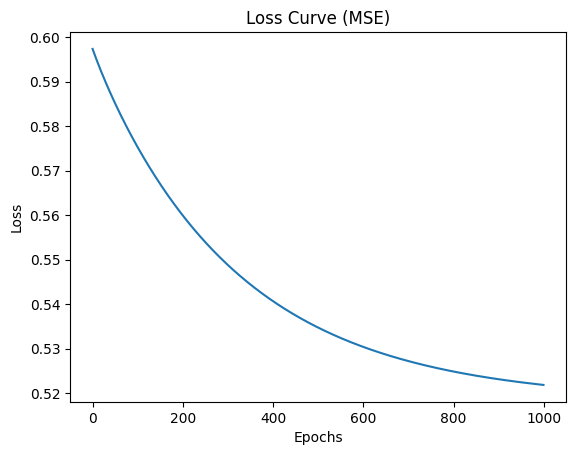

In [ ]:
plot_loss_curve(loss_history)

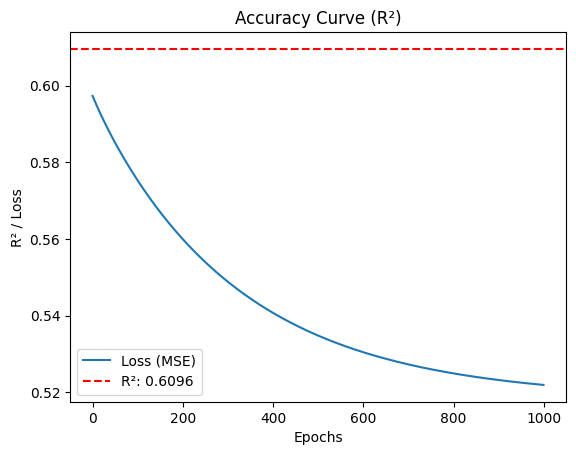

In [ ]:
# Plot the accuracy curve (Loss and R²)
plot_accuracy_curve(X_train, y_train, m, c, loss_history)

#**Define Model Evaluation Funtion**

In [ ]:
def evaluate_model(X_test, y_test, m, c):
    # Make predictions on the test set
    y_pred = np.dot(X_test, m) + c

    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r_squared(y_test, y_pred)

    print(f"Mean Squared Error (MSE) on Test Set: {mse}")
    print(f"Mean Absolute Error (MAE) on Test Set: {mae}")
    print(f"R-squared (R²) on Test Set: {r2}")

#**Evaluate the Model**

In [ ]:
evaluate_model(X_test, y_test, m, c)

Mean Squared Error (MSE) on Test Set: 0.55445417404903
Mean Absolute Error (MAE) on Test Set: 0.5337040423179147
R-squared (R²) on Test Set: 0.5768846342968954


# **Conclusion:**
* The model shows a moderate performance with MSE of 0.5544 and R² of 0.5769, indicating that it has room to improve in terms of accuracy.
* MAE provides additional insight into prediction errors, showing that the model is generally consistent in terms of error magnitude.
* To improve performance, consider enhancing the feature set, trying more complex models, tuning hyperparameters, or adding regularization.